# Task 6

**The purpose of the work:** to learn how to build a **Multiple Regression regression model,
evaluate its quality and the quality of its work.

### Variant 2
Because my student ID number is 8ПМ32422

## Task 1

1. Use the data from lab #2 (your chosen dataset).
2. Select the dependent and 2 independent variables (you can add one more independent
variable from the previous work), build a linear regression. What is the nature of the
relationship between all variables? Plot the graph and calculate the correlation.
3. Create a linear regression model (y  x1+x2). Are all parameters significant? Provide a
description. Plot Partial Regression Plots, CCPR plots, Residuals vs fitted plot, describe
results. Check the distribution of residuals for normality. Give an overall assessment of
the quality of the created model.
4. Analyze all points of influence. Plot the influence plot. Try to remove the most influential
points one by one? How has the quality of the model changed?
5. Create a linear regression model (y  x1+x2+x1·x2). Are all parameters significant?
Provide a description. Plot Partial Regression Plots, CCPR plots, Residuals vs fitted plot,
describe results. Check the distribution of residuals for normality. Give an overall
assessment of the quality of the created model.
6. Choose the best model (based on overall ratings).
7. Create a report including code, results, descriptions and conclusions and submit for
review through the Moodle system.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.datasets
from sklearn.preprocessing import PolynomialFeatures

In [2]:
from sklearn import datasets

diabetes = datasets.load_diabetes()
df = pd.DataFrame(data=np.c_[diabetes.data, diabetes.target], columns=diabetes.feature_names + ['target'])
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


**s1** - dependent

**s2** - const

**s6** - const

In [3]:
df = df[['s1', 's2', 's6']]

In [4]:
df.describe()

,s1,s2,s6
count,4.420000e+02,4.420000e+02,4.420000e+02
mean,-1.381499e-17,3.918434e-17,1.130318e-17
std,4.761905e-02,4.761905e-02,4.761905e-02
min,-1.267807e-01,-1.156131e-01,-1.377672e-01
25%,-3.424784e-02,-3.035840e-02,-3.317903e-02
50%,-4.320866e-03,-3.819065e-03,-1.077698e-03
75%,2.835801e-02,2.984439e-02,2.791705e-02
max,1.539137e-01,1.987880e-01,1.356118e-01


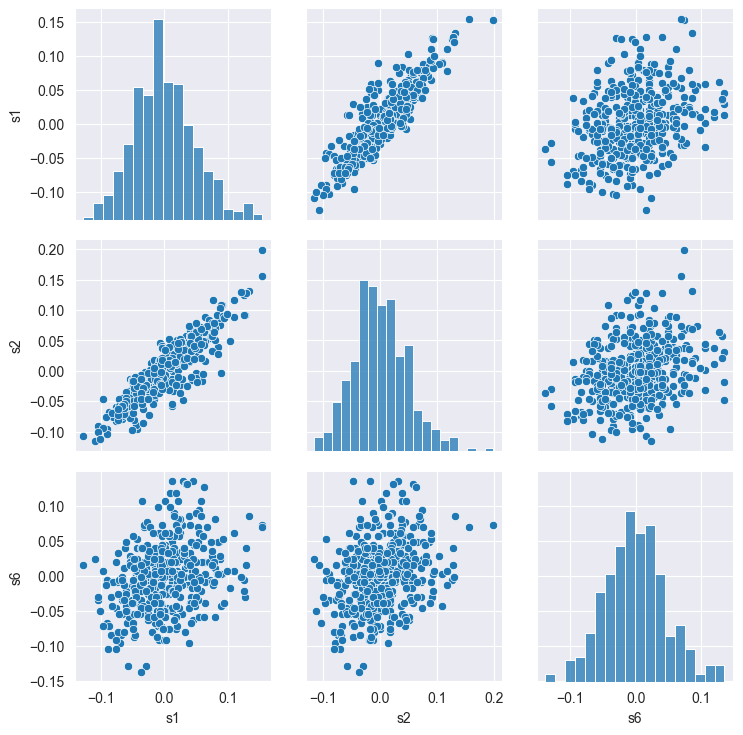

In [5]:
g = sns.PairGrid(df)
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)

<Axes: >

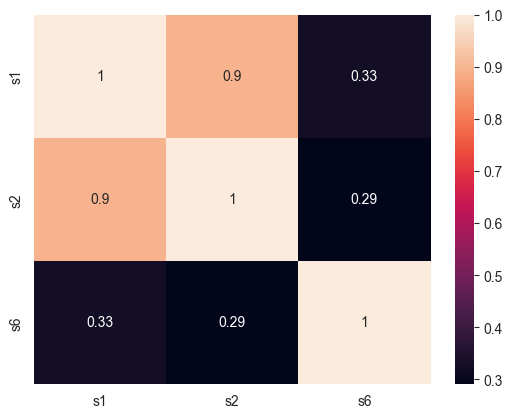

In [6]:
sns.heatmap(df.corr(), annot=True)

In [7]:
from sklearn.model_selection import train_test_split

X = np.column_stack((df['s2'], df['s6']))

X_train, X_test, y_train, y_test = train_test_split(X, df['s1'], test_size=0.2, random_state=42)

### s1 ~ s2 + s6

In [8]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

### Partial Regression Plots

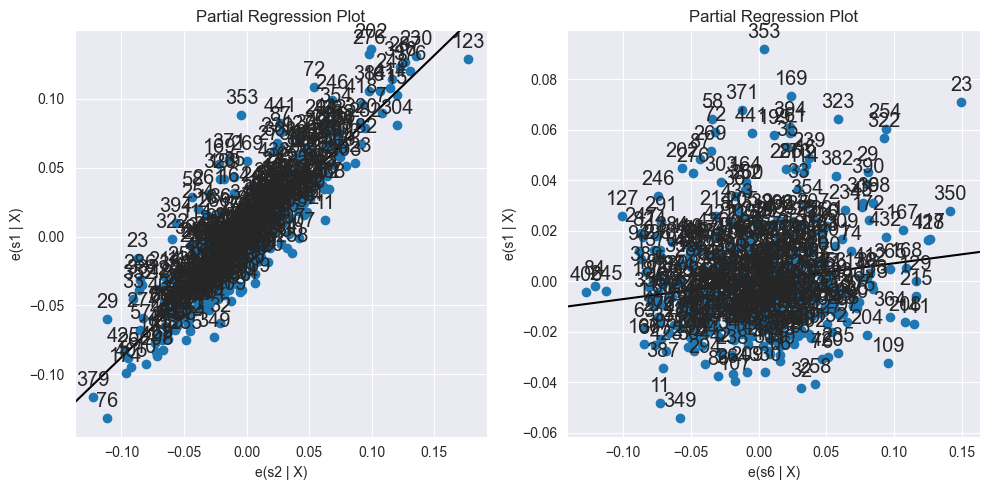

In [9]:
from statsmodels.graphics.regressionplots import plot_partregress

fig = plt.figure(figsize=(10, 5))

ax1 = fig.add_subplot(121)
plot_partregress(endog='s1', exog_i='s2', exog_others=['s6'], data=df, ax=ax1)

ax2 = fig.add_subplot(122)
plot_partregress(endog='s1', exog_i='s6', exog_others=['s2'], data=df, ax=ax2)

plt.tight_layout()
plt.show()

### CCPR plots

In [10]:
import statsmodels.api as sm

X_const = sm.add_constant(X_train)
ols_model = sm.OLS(y_train, X_const).fit()
ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     s1   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     696.8
Date:                Sun, 29 Sep 2024   Prob (F-statistic):          9.07e-123
Time:                        15:46:52   Log-Likelihood:                 856.52
No. Observations:                 353   AIC:                            -1707.
Df Residuals:                     350   BIC:                            -1695.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.121e-06      0.001      0.004      0.996      -0.002       0.002
x1             0.8716      0.025     34.682      0.000       0.822       0.921
x2             0.0750      0.025      3.033      0.003       0.026       0.124
==============================================================================
Omnibus:                       60.085   Durbin-Watson:                   2.080
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               95.779
Skew:                           1.020   Prob(JB):                     1.59e-21
Kurtosis:                       4.533   Cond. No.                         24.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

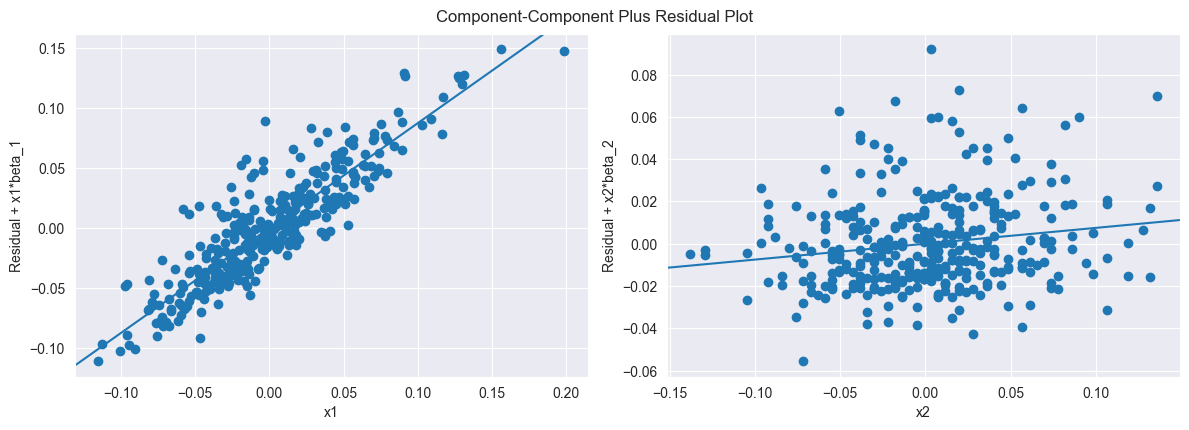

In [11]:
from statsmodels.graphics.regressionplots import plot_ccpr, plot_ccpr_grid

fig = plt.figure(figsize=(12, 8))
plot_ccpr_grid(ols_model, fig=fig)
plt.show()

###  Residuals vs fitted plot

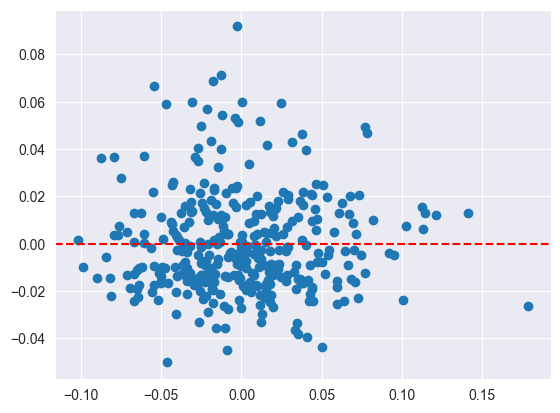

In [12]:
fitted = model.predict(X_train)
residuals = y_train - fitted

plt.scatter(fitted, residuals)
plt.axhline(y=0, color='r', linestyle='--')

### s1 ~ s2 + s6 + s2 * s6

In [13]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_poly = poly.fit_transform(X)

In [26]:
df['sm'] = X_poly[:,2]
df

C:\Users\hjklv\AppData\Local\Temp\ipykernel_29824\604561263.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sm'] = X_poly[:,2]


,s1,s2,s6,sm
0,-0.044223,-0.034821,-0.017646,0.000614
1,-0.008449,-0.019163,-0.092204,0.001767
2,-0.045599,-0.034194,-0.025930,0.000887
3,0.012191,0.024991,-0.009362,-0.000234
4,0.003935,0.015596,-0.046641,-0.000727
...,...,...,...,...
437,-0.005697,-0.002566,0.007207,-0.000018
438,0.049341,0.079165,0.044485,0.003522
439,-0.037344,-0.013840,0.015491,-0.000214
440,0.016318,0.015283,-0.025930,-0.000396


In [28]:
X_train, X_test, y_train, y_test = train_test_split(X_poly, df['s1'], test_size=0.2, random_state=42)

In [29]:
model = LinearRegression()
model.fit(X_train, y_train)
model.coef_

array([ 0.88307398,  0.0694869 , -1.44982935])

In [30]:
Y_pred = model.predict(X_test)

In [31]:
model.score(X_test, y_test)

0.8406954494767007

### Partial Regression Plots

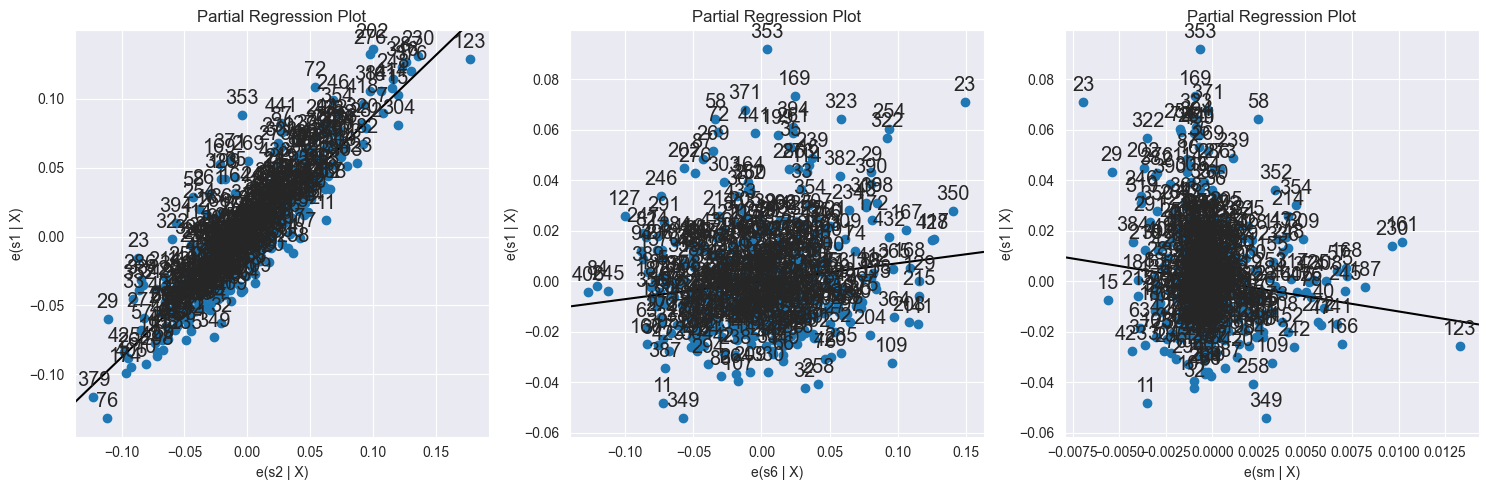

In [36]:
from statsmodels.graphics.regressionplots import plot_partregress

fig = plt.figure(figsize=(15, 5))

ax1 = fig.add_subplot(131)
plot_partregress(endog='s1', exog_i='s2', exog_others=['s6'], data=df, ax=ax1)

ax2 = fig.add_subplot(132)
plot_partregress(endog='s1', exog_i='s6', exog_others=['s2'], data=df, ax=ax2)

ax3 = fig.add_subplot(133)
plot_partregress(endog='s1', exog_i='sm', exog_others=['s2'], data=df, ax=ax3)

plt.tight_layout()
plt.show()

### CCPR plots

In [37]:
from statsmodels.formula.api import ols

ols_model = ols('s1 ~ s2 + s6 + s2 * s6', data=df).fit()
ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     s1   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     628.5
Date:                Sun, 29 Sep 2024   Prob (F-statistic):          3.00e-158
Time:                        15:59:12   Log-Likelihood:                 1087.8
No. Observations:                 442   AIC:                            -2168.
Df Residuals:                     438   BIC:                            -2151.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0008      0.001      0.733      0.464      -0.001       0.003
s2             0.8803      0.022     40.480      0.000       0.838       0.923
s6             0.0691      0.022      3.187      0.002       0.027       0.112
s2:s6         -1.1478      0.446     -2.573      0.010      -2.025      -0.271
==============================================================================
Omnibus:                       64.786   Durbin-Watson:                   1.872
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              101.847
Skew:                           0.920   Prob(JB):                     7.66e-23
Kurtosis:                       4.464   Cond. No.                         452.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

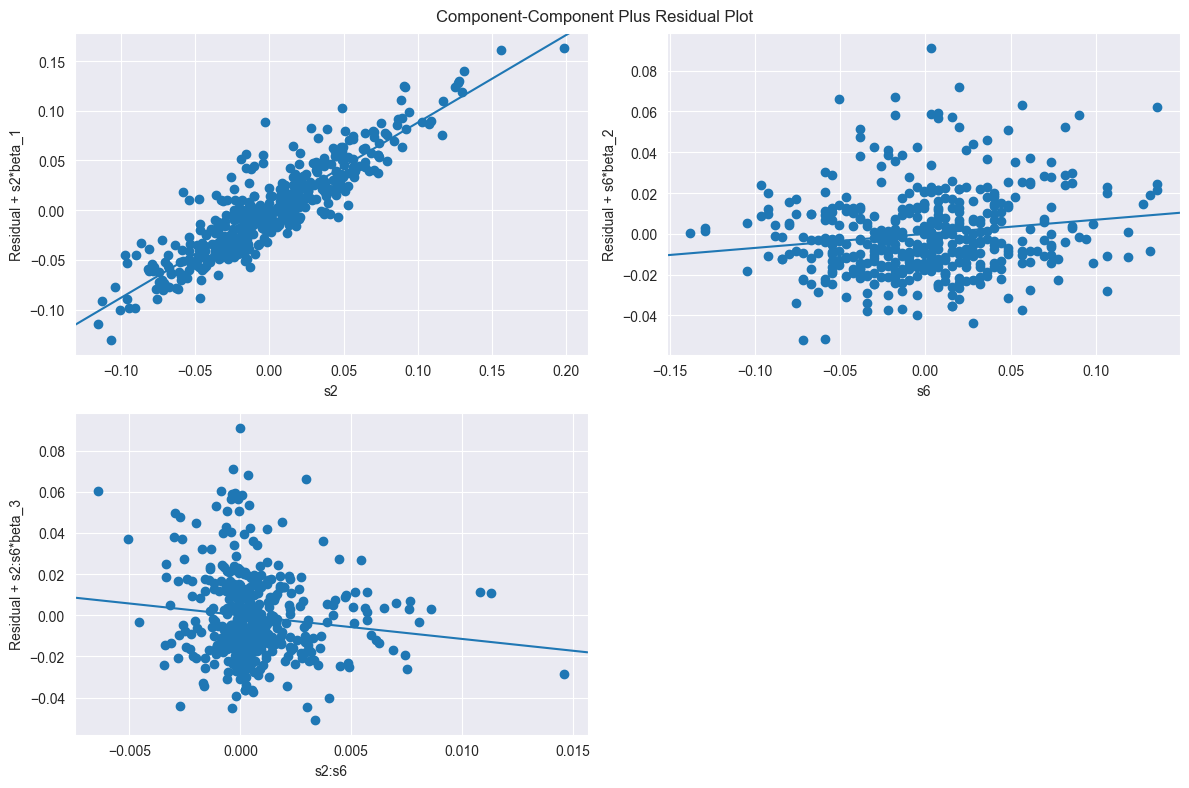

In [38]:
from statsmodels.graphics.regressionplots import plot_ccpr, plot_ccpr_grid

fig = plt.figure(figsize=(12, 8))
plot_ccpr_grid(ols_model, fig=fig)
plt.show()

###  Residuals vs fitted plot

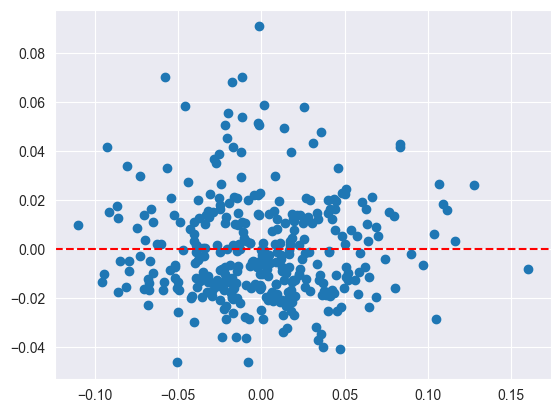

In [39]:
fitted = model.predict(X_train)
residuals = y_train - fitted

plt.scatter(fitted, residuals)
plt.axhline(y=0, color='r', linestyle='--')